### Ridge Regression:

Use scikit-learn to perform Ridge Regression

Import Necessary Libraries

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


Load Your Data
1. read attributes.csv
2. read the data
3. drop non predictive variables
4. check for ? and replace it with nan
   

In [77]:
attrib = pd.read_csv('/Users/luisf/Desktop/Semestre_4/Machine_learning/lab/MachineLearning2024_Hertie_School/Data/communitiesandcrime/attributes.csv', delim_whitespace = True)

In [78]:
data = pd.read_csv('/Users/luisf/Desktop/Semestre_4/Machine_learning/lab/MachineLearning2024_Hertie_School/Data/communitiesandcrime/communities.data', names = attrib['attributes'])

In [61]:
print(data.shape)

(1994, 128)


In [62]:
data = pd.read_csv('/Users/luisf/Desktop/Semestre_4/Machine_learning/lab/MachineLearning2024_Hertie_School/Data/communitiesandcrime/communities.data', names = attrib['attributes'])
data 

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [79]:
data = data.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [93]:
data = data.replace ('?', np.nan)
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [94]:
feat_miss = data.columns[data.isnull().any()]

print(feat_miss)
feat_miss.shape

Index([], dtype='object')


(0,)

fill missing values:

In [95]:
from sklearn.impute import SimpleImputer #to handle missing values by adding the average of the column. 

In [96]:
# Create an instance of SimpleImputer with mean strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the data and transform the column in one step
data['OtherPerCap'] = imputer.fit_transform(data[['OtherPerCap']])


The other variables have a lot of missing values. Drop them for now:

Now see the shape of the data 

Also see first 5 columns of your data using the head function.

In [97]:
data = data.dropna(axis=1)
print(data.shape)
data.head()

(1994, 101)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


Read your feature matrix into a variable X using data.iloc and output variable in y:

In [98]:
X = data.iloc[:,0:100].values #the matrix of independent variables, from 0-99 columns
y = data.iloc[:, 100].values #The column 100 is your dependent variable
print(X)

[[0.19 0.33 0.02 ... 0.26 0.2  0.32]
 [0.   0.16 0.12 ... 0.12 0.45 0.  ]
 [0.   0.42 0.49 ... 0.21 0.02 0.  ]
 ...
 [0.16 0.37 0.25 ... 0.32 0.18 0.91]
 [0.08 0.51 0.06 ... 0.38 0.33 0.22]
 [0.2  0.78 0.14 ... 0.3  0.05 1.  ]]


Divide your data into train and test using 70 % data for training and 30 % for testing:

In [99]:
seed = 123

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=seed)
print(X.shape)
print(y.shape)

(1994, 100)
(1994,)


Standardize features by removing the mean and scaling to unit variance

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.46361706 -0.38765983 -0.671381   ... -0.20461755 -0.61971349
  -0.40335211]
 [ 0.18095331 -0.08244171 -0.671381   ...  0.19251842 -0.35523247
  -0.40335211]
 [-0.38304576 -1.42540142 -0.63095382 ... -0.00604956 -0.53155315
  -0.40335211]
 ...
 [-0.30247447  0.03964554 -0.59052663 ... -0.45282753 -0.48747298
  -0.40335211]
 [-0.14133187 -0.81496519  1.02656058 ... -0.20461755 -0.70787384
  -0.40335211]
 [ 1.22838016  1.62677974 -0.59052663 ...  2.17819829  0.04148908
   1.09366516]]
[[-0.46361706  3.27495757 -0.71180818 ... -0.8996055  -0.39931264
  -0.40335211]
 [-0.30247447  0.52799452 -0.671381   ... -0.80032151  1.58429508
  -0.40335211]
 [-0.30247447 -0.38765983 -0.26710919 ...  0.19251842  3.12710109
  -0.40335211]
 ...
 [-0.38304576  0.40590728 -0.14582765 ... -0.45282753 -0.66379367
  -0.40335211]
 [-0.06076058 -1.12018331 -0.55009945 ... -0.60175352 -0.66379367
  -0.40335211]
 [-0.22190317  3.27495757 -0.671381   ...  3.81638417  1.4079744
  -0.40335211]]


 Split your training data further into training(80 %) and validation sets(20%)

In [102]:

X_train_1, X_val, y_train_1, y_val = train_test_split(X,y,test_size=.20, random_state=seed)
print(X.shape)
print(y.shape)

(1994, 100)
(1994,)


Define a Range of Alpha Values

In scikit learn, the lambda of ridge regression is referred to as alpha.


In [103]:
alphas = np.logspace(-4, 4, 100)


Initialize Lists to Store Results

In [104]:
alpha_values = []
mse_values = []


Loop Over Alpha Values, Fit the Model, and Record MSE

For each alpha value, fit a Ridge Regression model and evaluate its performance on the validation set.

In [105]:
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_1, y_train_1)  # Train the model
    y_pred = model.predict(X_val)  # Predict on validation set
    mse = mean_squared_error(y_val, y_pred)  # Calculate MSE
    
    alpha_values.append(alpha)  # Store alpha
    mse_values.append(mse)  # Store MSE


Identify the Best Alpha and Its Corresponding MSE

Find the alpha value that results in the lowest MSE.

The np.argmin function in NumPy is used to find the index of the minimum value in an array. When you use np.argmin(mse_values), it returns the index of the smallest value in the mse_values array.

In [106]:
best_alpha = alpha_values[np.argmin(mse_values)]
best_mse = min(mse_values)
print(f"Best Alpha: {best_alpha}")
print(f"Lowest MSE: {best_mse}")


Best Alpha: 7.054802310718645
Lowest MSE: 0.018168848752340958


Plot MSE vs. Alpha
Create a plot to visualize how MSE changes with different alpha values.

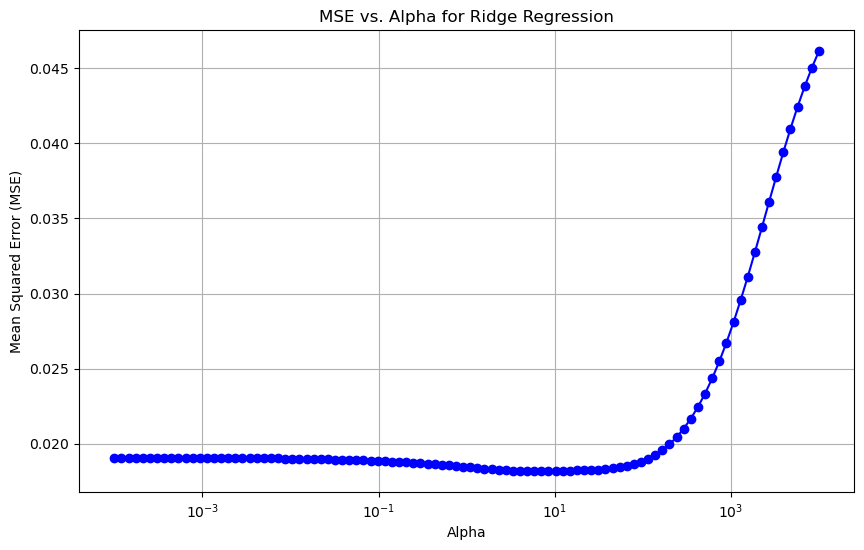

In [107]:
plt.figure(figsize=(10, 6))
plt.semilogx(alpha_values, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Alpha for Ridge Regression')
plt.grid(True)
plt.show()


To calculate the final Mean Squared Error (MSE) on the test set using the best alpha value identified from the validation set, we follow the steps ahead. This will give us an estimate of how well your Ridge Regression model is expected to perform on unseen data.

Combine Training and Validation Sets
For the final model, you'll use both the training and validation data to train it, maximizing the amount of data the model can learn from.

X_train_1 and X_val are two arrays that are stacked vertically to form a new array X_train_val. This means that if X_train_1 has a shape of (m, n) and X_val has a shape of (k, n), the resulting array X_train_val will have a shape of (m+k, n), effectively combining the rows of both arrays into one.

y_train_1 and y_val are one-dimensional arrays (labels or targets for a machine learning model), and np.concatenate is used to join them end-to-end into a single one-dimensional array y_train_val. If y_train_1 has a shape of (m,) and y_val has a shape of (k,), then y_train_val will have a shape of (m+k,).

In [108]:
# Combine the training and validation sets
X_train_val = np.vstack((X_train_1, X_val))
y_train_val = np.concatenate((y_train_1, y_val))


Train the Final Model on the Combined Data
Using the best alpha value found, train the Ridge Regression model on the combined training and validation data.

In [109]:
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train_val, y_train_val)


Ridge(alpha=7.054802310718645)

Make Predictions on the Test Set and Calculate MSE.

Finally, predict on the test set using the final model and calculate the Mean Squared Error.

In [110]:
y_test_pred = final_model.predict(X_test)  # Predict on the test set
final_test_mse = mean_squared_error(y_test, y_test_pred)  # Calculate MSE on the test set
print(f"Final Test MSE: {final_test_mse}")


Final Test MSE: 0.6905061037358953


### Lasso Regression:

In [111]:
from sklearn.linear_model import Lasso

Define a Range of Alpha Values
Choose a range of alpha values to test. 

In [112]:
#Define alpha as ridge
alphas = l


SyntaxError: invalid syntax (2496648090.py, line 2)

Loop Over Alpha Values and Store Results

Initialize lists to store alpha values and their corresponding MSEs. Then, loop over the alpha values, fit a Lasso model for each, and evaluate its performance on the validation set.

In [ ]:
alpha_values = []
mse_values = []
best_alpha = None
lowest_mse = np.inf

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train_1, y_train_1)
    y_pred = 
    mse = 
    
    alpha_values.append(alpha)
    mse_values.append(mse)
    
    if mse < lowest_mse:
        best_alpha = alpha
        lowest_mse = mse


Plot MSE vs. Alpha

Visualize how the Mean Squared Error changes with different alpha values.

In [ ]:
## use the commands to plot for ridge

Print the Best Alpha and Its MSE
Output the best alpha value found and its corresponding lowest MSE.

In [ ]:
print(f"Best Alpha: 
print(f"Lowest MSE: 


Lasso model can lead to sparse solutions by setting some coefficients to zero. This approach is useful for feature selection in addition to regularization.

 Combine the training and validation sets for the final model training

In [ ]:

X_train_val = np.vstack
y_train_val = np.concatenate


Initialize the Lasso model with the best alpha value


In [ ]:
final_lasso_model = Lasso

Fit the model on the combined training and validation data


In [ ]:
final_lasso_model.fit

 Make predictions on the test set


In [ ]:
y_test_pred = final_lasso_model.predict

Calculate the Mean Squared Error on the test set


In [ ]:
final_test_mse = mean_squared_error

In [ ]:
# Print the final test MSE
print(f"Final Test MSE for Lasso: 
print(f"Final Test MSE for Ridge: 

